In [1]:
from dataset_modelnet40 import MultiViewDataset
from torchvision import transforms
from torch.utils.data import DataLoader

In [2]:
# Transforms
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Datasets
train_dataset = MultiViewDataset(root_dir='/home/venom/ssd/3d/modelnet40_images_new_12x', split='train', transform=transform)
test_dataset = MultiViewDataset(root_dir='/home/venom/ssd/3d/modelnet40_images_new_12x', split='test', transform=transform)

# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=200, shuffle=True, num_workers=8)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=8)


In [3]:
batch = next(iter(train_loader))

In [4]:
data, label = batch[0], batch[1]

In [5]:
data.shape

torch.Size([200, 12, 3, 224, 224])

In [6]:
# load tsne
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

from sklearnex import patch_sklearn

patch_sklearn()


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [7]:
data.view(data.shape[0], -1).numpy().shape

(200, 1806336)

In [8]:
# PCA 50 dim
pca = PCA(n_components=200)
pca_result = pca.fit_transform(data.view(data.shape[0], -1).numpy())

In [9]:
print('Cumulative explained variation for 200 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative explained variation for 200 principal components: 0.9999999403953552


In [10]:
# TSNE the batch
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=600)
tsne_results = tsne.fit_transform(pca_result)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.133s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 161.609304


[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.252708
[t-SNE] KL divergence after 600 iterations: 0.374775


In [11]:
tsne_results.shape

(200, 2)

In [12]:
# convert to numpy
label = label.numpy()

In [13]:
label

array([13,  3,  2, 25, 19,  1, 30, 37,  0, 35,  8, 38,  7, 22, 13, 31,  4,
        4, 37, 17, 33, 30, 11, 36,  8, 23,  0,  8, 31, 15, 33, 30,  8, 33,
       15, 22, 33,  4, 35, 33, 17,  7, 30, 19, 35, 34, 30, 15, 25,  6, 21,
       17, 30, 26, 20, 35, 37,  4, 25,  4, 13,  0,  7, 21,  2, 26, 21, 22,
       22, 22, 30, 30,  0, 35, 14, 39, 30, 21, 33, 29, 34, 36, 34,  4,  7,
       35,  0, 30, 26,  8, 26,  0, 22,  2, 22, 36, 12, 35,  0, 30, 14, 17,
       37, 37, 35,  9, 26, 29,  9,  3, 36,  7, 31,  5, 26, 37, 17,  2, 37,
       10, 30,  0,  8, 22,  4, 27, 21, 21, 28, 30,  8,  3, 36,  4, 37, 37,
       22, 12, 26, 18, 21, 16, 17,  8,  0, 22, 12, 21, 25, 25, 30, 32, 30,
       26, 20, 30,  8,  8, 22,  9,  4,  9, 36, 28, 37,  2, 34,  7, 37, 12,
       15, 14,  0,  8,  0, 35, 17, 30, 34, 13, 37, 21, 26,  3, 37, 16, 26,
       39,  5, 37,  8,  8,  5,  5, 36, 33, 17,  0,  8,  8])

/tmp/ipykernel_2701459/296995850.py:3: UserWarning: 
The palette list has fewer values (6) than needed (39) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


<Axes: >

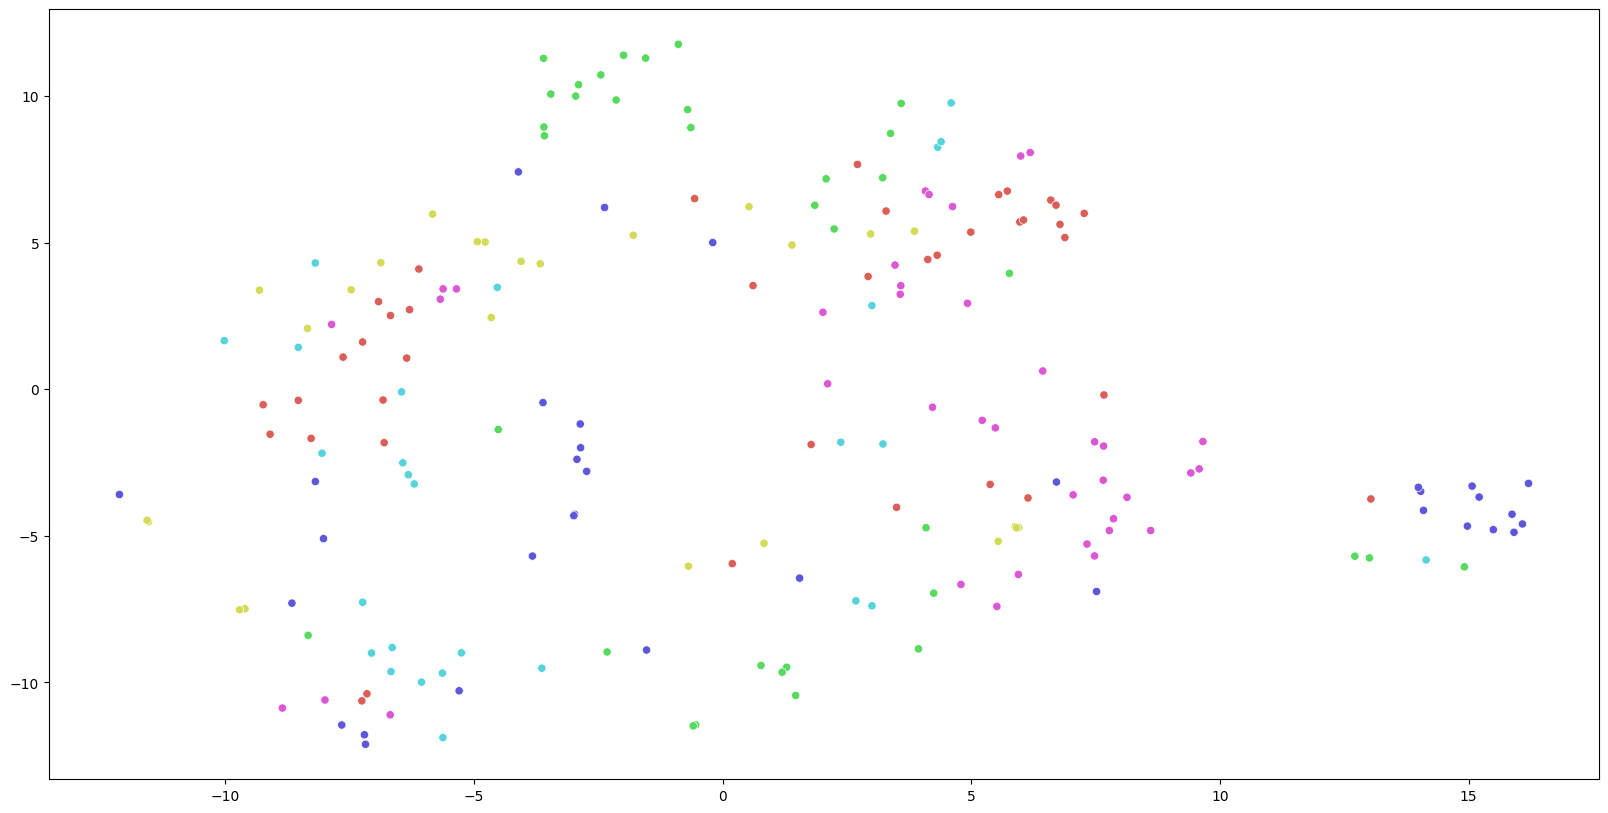

In [16]:
# plot
plt.figure(figsize=(20, 10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=label,
    palette=sns.color_palette("hls"),
    legend=None,
    #alpha=0.3
)